# Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

# Import data

In [2]:
# Import data from URL and add column names
thyroid_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/new-thyroid.data', header = None)
thyroid_df.columns = ['class', 't3_resin', 'isotopic', 'radioimmuno', 'tsh', 'tsh_diff']

# Data transformation to binary classifier

In [3]:
thyroid_df['class'].replace(1, 0, inplace = True)
thyroid_df['class'].replace(3, 0, inplace = True)
thyroid_df['class'].replace(2, 1, inplace = True)

In [4]:
thyroid_df.head()

,class,t3_resin,isotopic,radioimmuno,tsh,tsh_diff
0,0,107,10.1,2.2,0.9,2.7
1,0,113,9.9,3.1,2.0,5.9
2,0,127,12.9,2.4,1.4,0.6
3,0,109,5.3,1.6,1.4,1.5
4,0,105,7.3,1.5,1.5,-0.1


In [5]:
thyroid_df['class'].value_counts()

0    180
1     35
Name: class, dtype: int64

In [6]:
# Separate labels, so we don't scale the categorical values
X = thyroid_df.iloc[:,1:]
y = thyroid_df.iloc[:,0]

# Fit logistic regression function
## Single feature

In [7]:
# instantiate the model (using the default parameters)
log_reg = LogisticRegression(solver='lbfgs', random_state=42)

# fit the model with data
log_reg_single_feature = log_reg.fit(X.loc[:,'radioimmuno'].values.reshape(-1,1), y)

In [8]:
# Coefficients of fitted model
log_reg_single_feature.coef_

array([[2.24802768]])

In [9]:
# Intercept of fitted model
log_reg_single_feature.intercept_

array([-6.84381141])

Decision boundary: 3.053053053053053


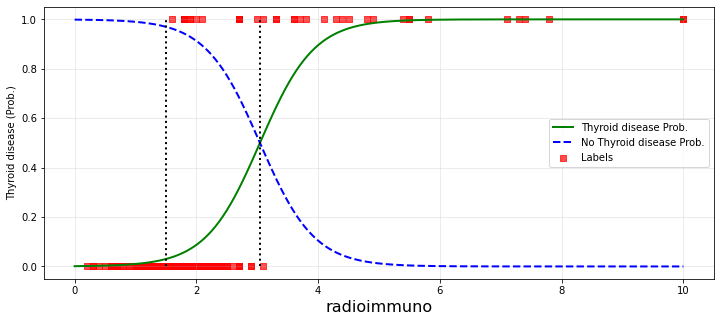

In [10]:


target = 'radioimmuno'

X_new = np.linspace(0, 10, 1000).reshape(-1, 1)
y_proba = log_reg_single_feature.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1]>0.5][0]
print("Decision boundary: {0}".format(decision_boundary[0]))

fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(X_new, y_proba[:,0], "b--", linewidth=2, label="No Thyroid disease Prob.")
ax.plot(X_new, y_proba[:,1], "g-", linewidth=2, label="Thyroid disease Prob.")
ax.scatter(X[target],y,alpha=0.7,color='r',marker='s',label='Labels')
ax.set_xlabel(target,fontsize=16)
ax.set_ylabel('Thyroid disease (Prob.)')
ax.grid(alpha=0.3)
ax.plot([decision_boundary,decision_boundary],[0,1], "k:", linewidth=2)
ax.plot([1.5,1.5],[0,1], "k:", linewidth=2)
ax.legend()
plt.show()

## Use 2 features

In [14]:
# instantiate the model
log_reg = LogisticRegression(solver='lbfgs', C=10, random_state=42)

# fit the model with data
features = ['radioimmuno','t3_resin']
lr_2_features = log_reg.fit(X.loc[:,features],y)
# Coefficients of fitted model
lr_2_features.coef_

array([[ 2.94216322, -0.0935391 ]])

In [15]:
# Intercept of fitted model
lr_2_features.intercept_

array([1.79361282])

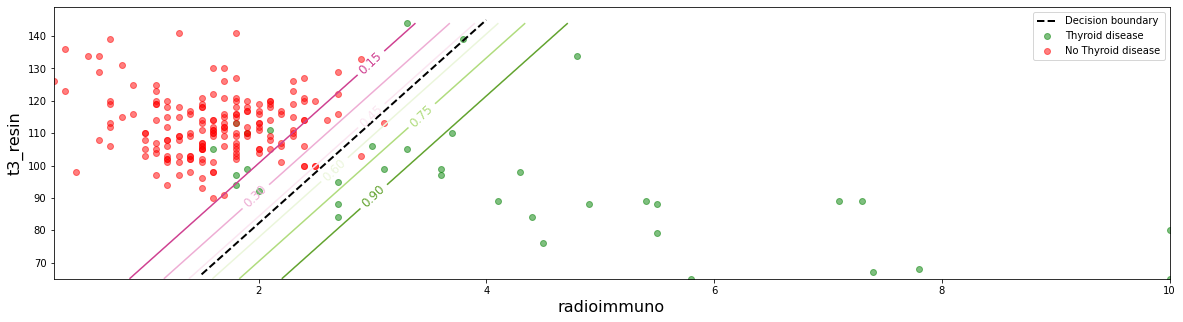

In [16]:
n_samples = 200
x0, x1 = np.meshgrid(np.linspace(min(X.loc[:,features[0]].values), max(X.loc[:,features[0]].values), n_samples).reshape(-1, 1),
                     np.linspace(min(X.loc[:,features[1]]), max(X.loc[:,features[1]]), n_samples).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = lr_2_features.predict_proba(X_new)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.scatter(X.loc[y[y==1].index,features[0]],X.loc[y[y==1].index,features[1]],marker="o",c='g',label='Thyroid disease',alpha=0.5)
ax.scatter(X.loc[y[y==0].index,features[0]],X.loc[y[y==0].index,features[1]],marker="o",c='r',label='No Thyroid disease',alpha=0.5)

zz = y_proba[:,1].reshape(x0.shape)
contour = ax.contour(x0, x1, zz, cmap=plt.cm.PiYG)
ax.clabel(contour, inline=1, fontsize=12)

left_right = np.array([1.5,4])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
ax.plot(left_right, boundary, "k--", linewidth=2, label='Decision boundary')

ax.set_xlabel(features[0],fontsize=16)
ax.set_ylabel(features[1],fontsize=16)
ax.legend()
plt.show()

# Use Multi Class dataset

In [17]:
from sklearn import datasets
iris = datasets.load_iris()

features = iris['feature_names']
used_features  = (1, 3)
X = iris["data"][:,used_features]  # petal length, petal width
y = iris["target"]

In [18]:
# set multi_class to "multinomial" to use SOFTMAX
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

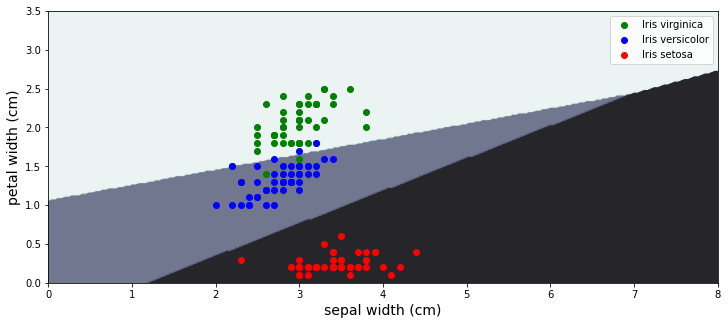

In [19]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 200).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = softmax_reg.predict(X_new)
zz = y_predict.reshape(x0.shape)

fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(X[y==2, 0], X[y==2, 1], "go", label="Iris virginica")
ax.plot(X[y==1, 0], X[y==1, 1], "bo", label="Iris versicolor")
ax.plot(X[y==0, 0], X[y==0, 1], "ro", label="Iris setosa")
ax.contourf(x0, x1, zz,alpha=0.9,cmap=plt.cm.bone)
plt.xlabel(features[used_features[0]], fontsize=14)
plt.ylabel(features[used_features[1]], fontsize=14)
plt.legend(fontsize=10)
plt.show()